# Apple Stock trading strategy

This code appears to be an implementation of a simple stock trading strategy using moving averages, specifically the Simple Moving Average (SMA) with a 20-day and 50-day window. The strategy is designed to generate buy and sell signals based on the relationship between these moving averages and the historical adjusted closing prices of Apple stock.

#### Data Preparation:
It starts by loading stock price data from a CSV file named "stock.csv" into a Pandas DataFrame called prices. The "Date" column is parsed as datetime.A new DataFrame called stock is created to store relevant data. It extracts the "Date" and "Adj Close Price" columns from the prices DataFrame and adds them to stock.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
prices = pd.read_csv("stock.csv", parse_dates=["Date"])

In [3]:
prices

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
...,...,...,...,...,...,...,...
1505,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
1506,2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1507,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1508,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200


In [4]:
stock = pd.DataFrame()

In [5]:
stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [6]:
stock.head()

,Date,Apple
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699


1. **SMA20 and SMA50 Calculations**: In this code, two new moving averages are calculated: the 20-day Simple Moving Average (SMA20) and the 50-day Simple Moving Average (SMA50). These moving averages are commonly used in technical analysis to identify trends.

In [7]:
stock["SMA20"] = stock["Apple"].rolling(20).mean()

In [8]:
#pd.options.display.max_rows = None

In [9]:
stock

,Date,Apple,SMA20
0,2014-05-27,80.948952,NaN
1,2014-05-28,80.739334,NaN
2,2014-05-29,82.210480,NaN
3,2014-05-30,81.902557,NaN
4,2014-06-02,81.339699,NaN
...,...,...,...
1505,2020-05-18,314.959991,294.812523
1506,2020-05-19,313.140015,297.087250
1507,2020-05-20,319.230011,299.281020
1508,2020-05-21,316.850006,301.409145


In [10]:
stock["SMA50"] = stock["Apple"].rolling(50).mean()

In [11]:
stock

,Date,Apple,SMA20,SMA50
0,2014-05-27,80.948952,NaN,NaN
1,2014-05-28,80.739334,NaN,NaN
2,2014-05-29,82.210480,NaN,NaN
3,2014-05-30,81.902557,NaN,NaN
4,2014-06-02,81.339699,NaN,NaN
...,...,...,...,...
1505,2020-05-18,314.959991,294.812523,273.011395
1506,2020-05-19,313.140015,297.087250,273.965167
1507,2020-05-20,319.230011,299.281020,274.658373
1508,2020-05-21,316.850006,301.409145,275.501645


2. **buy_sell Function**: This function is responsible for generating buy and sell signals based on the crossover of SMA20 and SMA50. It also calculates the profit/loss for each trade. The key points of this function are:
   - It iterates through the DataFrame and checks if SMA20 crosses above SMA50 (indicating a buy signal) or below SMA50 (indicating a sell signal).
   - When a buy signal is detected, it records the buy price and sets the "sig" variable to 1, indicating a holding position.
   - When a sell signal is detected, it calculates the profit/loss for the trade based on the difference between the buy price and the sell price.
   - It uses the "actions" list to record buy (1), sell (-1), or wait (0) actions.
   - It uses the "holding" list to track whether the strategy is holding the stock (1) or not (0).
   - The profit/loss for each trade is recorded in the "profit_loss" list.

In [12]:
def buy_sell(df):
    buy_price_price = []
    sell_price_price = []
    holding = []  # 1 for hold, 0 for not hold
    actions = []  # 1 for buy, -1 for sell, 0 for wait
    profit_loss = []  # Profit/Loss for each trade
    sig = 0
    buy_price = 0  # Initialize buy_price
    for i, row in df.iterrows():
        if row["SMA20"] > row["SMA50"]:  # Buy
            if sig != 1:
                buy_price_price.append(row["Apple"])
                sell_price_price.append(np.nan)
                sig = 1
                actions.append(1)
                holding.append(1)
                buy_price = row["Apple"]  # Set buy_price for the trade
            else:
                buy_price_price.append(np.nan)
                sell_price_price.append(np.nan)
                actions.append(0)
                holding.append(1)
            profit_loss.append(np.nan)
        elif row["SMA20"] < row["SMA50"]:  # Sell
            if sig != -1:
                buy_price_price.append(np.nan)
                sell_price_price.append(row["Apple"])
                sig = -1
                actions.append(-1)
                holding.append(0)
                if sig == 1:  
                    trade_profit_loss = buy_price - row["Apple"]  # Calculate profit/loss for a buy-sell trade
                    
                else:
                    trade_profit_loss = row["Apple"] - buy_price  # Calculate profit/loss for a sell-buy trade
            else:
                buy_price_price.append(np.nan)
                sell_price_price.append(np.nan)
                actions.append(0)
                holding.append(0)
                trade_profit_loss = np.nan
            profit_loss.append(trade_profit_loss)
        else:
            holding.append(0)
            buy_price_price.append(np.nan)
            sell_price_price.append(np.nan)
            actions.append(0)
            profit_loss.append(np.nan)

    return buy_price_price, sell_price_price, holding, actions, profit_loss

3. **Adding Buy Price, Sell Price, Hold, Actions, and Profit/Loss to DataFrame**: The results of the buy_sell function are assigned to new columns in the DataFrame: "Buy Price," "Sell Price," "Hold," "Actions," and "profit_loss."

In [13]:
buysell = buy_sell(stock)

In [14]:
stock["Buy Price"], stock["Sell Price"], stock["Hold"], stock["Actions"], stock["profit_loss"]  = buysell

In [15]:
stock

,Date,Apple,SMA20,SMA50,Buy Price,Sell Price,Hold,Actions,profit_loss
0,2014-05-27,80.948952,NaN,NaN,NaN,NaN,0,0,NaN
1,2014-05-28,80.739334,NaN,NaN,NaN,NaN,0,0,NaN
2,2014-05-29,82.210480,NaN,NaN,NaN,NaN,0,0,NaN
3,2014-05-30,81.902557,NaN,NaN,NaN,NaN,0,0,NaN
4,2014-06-02,81.339699,NaN,NaN,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...
1505,2020-05-18,314.959991,294.812523,273.011395,NaN,NaN,1,0,NaN
1506,2020-05-19,313.140015,297.087250,273.965167,NaN,NaN,1,0,NaN
1507,2020-05-20,319.230011,299.281020,274.658373,NaN,NaN,1,0,NaN
1508,2020-05-21,316.850006,301.409145,275.501645,NaN,NaN,1,0,NaN


4. **Plotting the Data**: The code then creates a plot showing the Apple stock price along with the SMA20 and SMA50 lines. Buy and sell points are marked with green "Buy" triangles and red "Sell" triangles, respectively. The profit/loss for each trade is annotated at the corresponding sell points, and the buy points are labeled as "Buy" on the graph.

5. **Text Adjustment**: To prevent text overlap on the graph, the "adjust_text" function from the "adjustText" library is used. It automatically adjusts the positions of the profit/loss annotations to avoid overlapping.

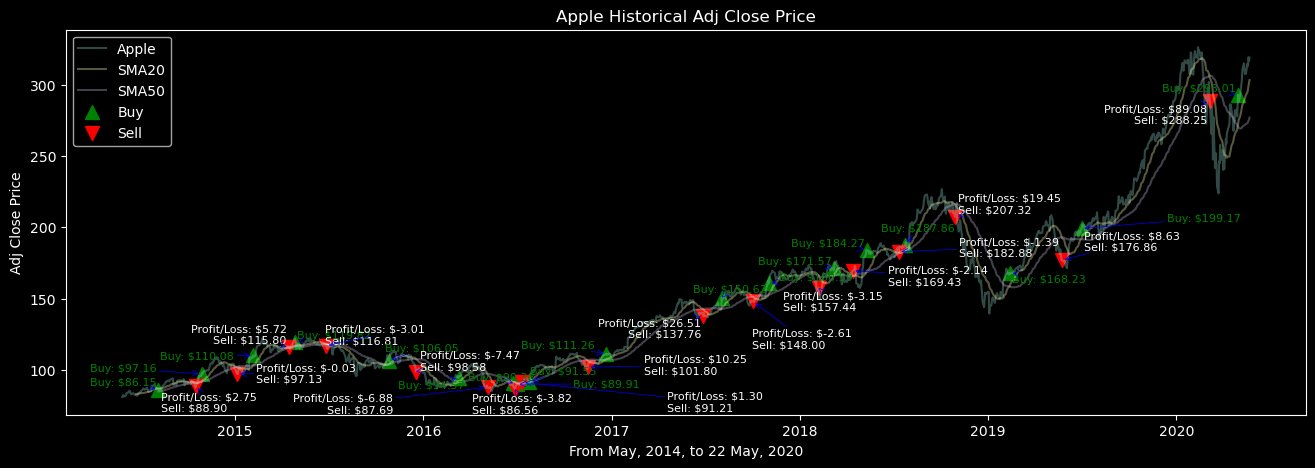

In [17]:
plt.figure(figsize=(16, 5))
plt.style.use("dark_background")

plt.plot(stock["Date"], stock["Apple"], label="Apple", alpha=0.35)
plt.plot(stock["Date"], stock["SMA20"], label="SMA20", alpha=0.35)
plt.plot(stock["Date"], stock["SMA50"], label="SMA50", alpha=0.35)

plt.scatter(stock["Date"], stock["Buy Price"], color="green", s=100, marker="^", label="Buy")
plt.scatter(stock["Date"], stock["Sell Price"], color="red", s=100, marker="v", label="Sell")

texts = []
for i, row in stock.iterrows():
    if not np.isnan(row["Sell Price"]):
        trade_profit_loss = row["profit_loss"]
        text = f"Profit/Loss: ${trade_profit_loss:.2f}\nSell: ${row['Sell Price']:.2f}"
        texts.append(plt.text(row["Date"], row["Apple"], text, fontsize=8, color="white", ha='center', va='center'))
    elif not np.isnan(row["Buy Price"]):
        text = f"Buy: ${row['Buy Price']:.2f}"
        texts.append(plt.text(row["Date"], row["Apple"], text, fontsize=8, color="green", ha='center', va='bottom'))

adjust_text(texts, force_text=0.2, arrowprops=dict(arrowstyle="->", color="b", lw=0.5))

plt.title("Apple Historical Adj Close Price")
plt.xlabel("From May, 2014, to 22 May, 2020")
plt.ylabel("Adj Close Price")
plt.legend()

plt.show()


Overall, this code enhances your stock trading strategy by incorporating two moving averages (SMA20 and SMA50) and annotating profit/loss at sell points while ensuring that text labels do not overlap on the graph. The strategy is based on crossover signals between the shorter SMA20 and longer SMA50, with buy and sell actions recorded accordingly.